# Classification with Logistic Regression and SVM

For this project we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). We'll be trying to predict a classification- survival or deceased.

## Import Libraries
Import all necessary libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## The Data
Read the train dataset in to a pandas dataframe

In [ ]:
df = pd.read_csv("titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.shape

(891, 12)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df["Pclass"].nunique()

3

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Exploratory Data Analysis

## Missing Data
Use the heatmap functionality of seaborn to see where we are missing data.

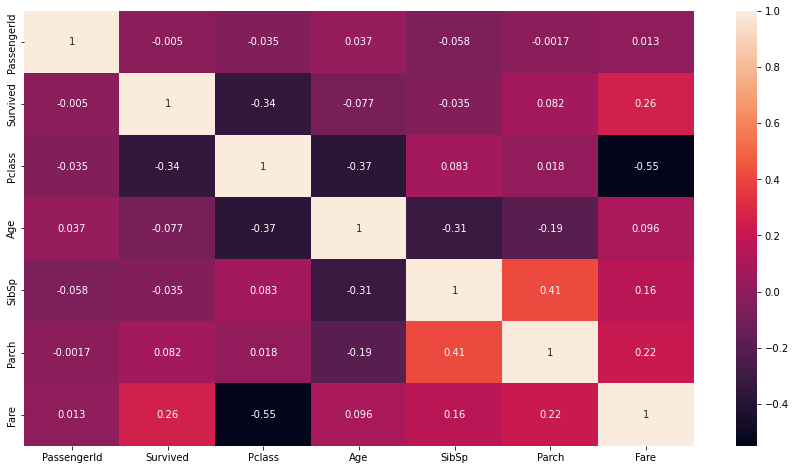

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

Create a histogram for the target variable "Survived". You can use the seaborn.countplot function. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


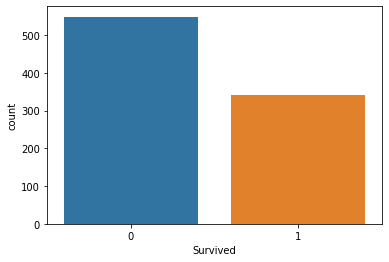

In [ ]:
sns.countplot(df['Survived'])

Create a histogram for the target variable "Survived" for males and females. 

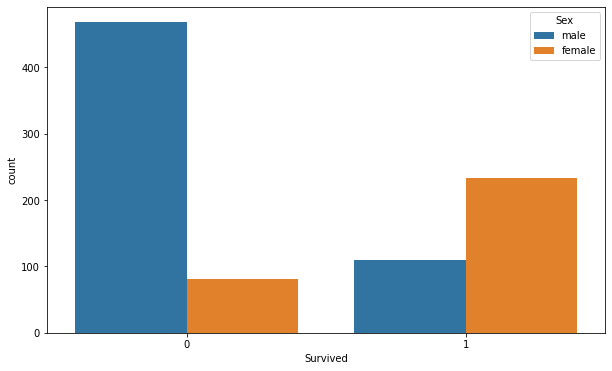

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'Survived', hue = 'Sex')

Create a histogram for the  "Pclass" feature.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


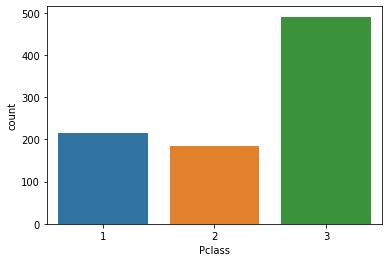

In [ ]:
sns.countplot(df['Pclass'])

## Data Cleaning
Fill in the missing data points with the average age for the age column. Drop the Cabin columna and all the row that have feature Emkarked that is NaN. 

In [ ]:
x=int(df["Age"].mean())
x

29

In [ ]:
df.drop('Cabin', inplace=True, axis=1)
df.drop('Name', inplace=True, axis=1)
df.drop('Ticket',inplace=True,axis=1)

In [ ]:
df['Age'].fillna(x,inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,29.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [ ]:
# df_1=df['Embarked'].dropna()

In [ ]:
df_1=df.dropna()
df_1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df_1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

## Converting Categorical Features 

Use pandas.get_dummies() function to convert categorical data

In [ ]:
df1=pd.get_dummies(df, columns=["Pclass","Embarked","Sex"])
df1.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,0,1,1,0
3,4,1,35.0,1,0,53.1000,1,0,0,0,0,1,1,0
4,5,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,1


In [ ]:
df1["Age"]=df1["Age"].astype(int)
df1["Fare"]=df1["Fare"].astype(int)
df1.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,22,1,0,7,0,0,1,0,0,1,0,1
1,2,1,38,1,0,71,1,0,0,1,0,0,1,0
2,3,1,26,0,0,7,0,0,1,0,0,1,1,0
3,4,1,35,1,0,53,1,0,0,0,0,1,1,0
4,5,0,35,0,0,8,0,0,1,0,0,1,0,1


# Logistic Regression Model
## Train Test Split

In [ ]:
x = df1.drop("Survived", axis = 1)
y = df1['Survived']

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 111)

## Training and Predicting

Train a Logistic Regression model with the training data. 

In [ ]:
model = LogisticRegression()
model.fit(xtrain, ytrain)
predict = model.predict(xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## Evaluation

Compute precision, recall, f1-score. Use the classification report from sklearn.metrics.

In [ ]:
metrics.classification_report(ytest, predict)

'              precision    recall  f1-score   support\n\n           0       0.83      0.86      0.84       171\n           1       0.73      0.68      0.71        97\n\n    accuracy                           0.79       268\n   macro avg       0.78      0.77      0.77       268\nweighted avg       0.79      0.79      0.79       268\n'

In [ ]:
metrics.accuracy_score(ytest, predict)

0.7947761194029851

# Support Vector Machines

## Train a Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
model_svc=SVC(C=100,kernel='rbf')

In [ ]:
model_svc.fit(xtrain, ytrain)

SVC(C=100)

In [ ]:
y_predicted=model_svc.predict(xtest)

In [ ]:
metrics.accuracy_score(ytest, y_predicted)

0.664179104477612

## Gridsearch Practice
Apply GridSearch to find the optimal values of C and gamma. Create a GridSearchCV object and fit it to the training data.

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(model_svc, param_grid, refit = True, verbose = 3)

In [ ]:
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.605 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.605 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.605 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.605 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.608 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(C=100),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid_predictions = grid.predict(xtest)


## Evaluation

In [ ]:
metrics.accuracy_score(ytest, grid_predictions)

0.7313432835820896

Evaluate the grid model by computing the precision, recall and f1-score. Use the classification report from sklearn.metrics.

In [ ]:
metrics.classification_report(ytest, grid_predictions)

'              precision    recall  f1-score   support\n\n           0       0.79      0.80      0.79       171\n           1       0.63      0.62      0.62        97\n\n    accuracy                           0.73       268\n   macro avg       0.71      0.71      0.71       268\nweighted avg       0.73      0.73      0.73       268\n'

## OPEN END QUESTION
Compare the performance of the logistic regression model and SVM in two paragraphs. Which one is performing better? Why? 


The performance of logistic regression is better than that of Support Vector Machines since the accuracy of logistic regression is around 79% while for SVM , it is around 73%.

SVM is deterministic, while logistic regression is probabilistic.
SVM needs GridSearhCV to improve its accuracy from 66% to 73% , though it is less than logistic regression